# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

# **Tasks, Part 1**

In [3]:
df = pd.read_csv("car_data.csv")

In [4]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [5]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [6]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


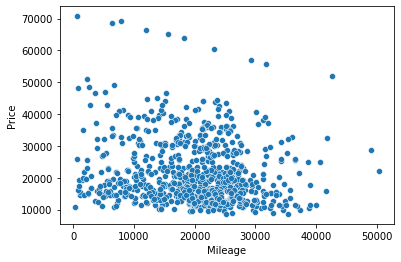

,Mileage,Price
Mileage,1.000000,-0.143051
Price,-0.143051,1.000000


In [7]:
import seaborn as sns
sns.scatterplot(x= df["Mileage"], y= df["Price"])
plt.show()
df[["Mileage", "Price"]].corr()

**No linear relationship** 

**Transformation required**

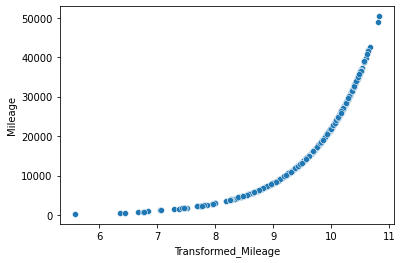

,Transformed_Mileage,Price
Transformed_Mileage,1.000000,-0.145424
Price,-0.145424,1.000000


In [12]:
df['Transformed_Mileage']= np.log(df['Mileage'])
sns.scatterplot(x= df['Transformed_Mileage'], y= df['Mileage'])
plt.show()
df[["Transformed_Mileage", "Price"]].corr()

**No linear relationship even after transforming**

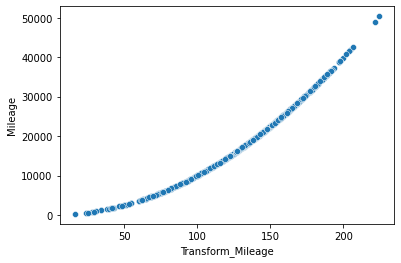

,Transform_Mileage,Price
Transform_Mileage,1.000000,-0.149316
Price,-0.149316,1.000000


In [13]:
df['Transform_Mileage']= np.sqrt(df['Mileage'])
sns.scatterplot(x= df['Transform_Mileage'], y= df['Mileage'])
plt.show()
df[["Transform_Mileage", "Price"]].corr()

**No linear relationship even after transforming**

In [14]:
X = df[['Mileage']].values #array of features
y = df['Price'].values #array of targets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [15]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train)
X_train = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test = scaler.transform(X_test) # transform the test data 

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [17]:
print(regressor.intercept_) # c
print(regressor.coef_) # m

21315.85595301999
[-1283.29632169]


In [18]:
y_pred = regressor.predict(X_test)
y_pred

array([20611.85449833, 21463.58759644, 20805.18787645, 23734.66679249,
       19314.18455725, 19233.74658241, 24089.03291946, 20303.90092604,
       23863.86930958, 16563.45669642, 18341.24569979, 23257.52691444,
       24077.74337913, 21088.99437637, 22809.08128474, 21395.69355529,
       21100.44071587, 20407.85877656, 22170.5950595 , 22402.97143126,
       21937.9050894 , 20596.80177789, 19571.64879641, 21351.00579149,
       22095.80185482, 20921.06246399, 20807.06946651, 21373.27127381,
       21944.64745376, 22737.26726431, 22543.14989033, 21085.85839295,
       21336.73706691, 20148.8265457 , 20427.14507462, 23659.55998947,
       20161.84087691, 20900.20817422, 21755.70445243, 21392.08717436,
       21538.06720277, 19966.62590873, 20920.74886565, 21396.79114949,
       23620.67379501, 20724.12270493, 20364.89580365, 20430.12425888,
       21183.07387911, 21707.09670935, 20916.35848885, 21006.36121314,
       19440.40789009, 20233.65489733, 21403.21991551, 23207.03758131,
      

In [19]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,11045.108844,20611.854498
1,12045.920705,21463.587596
2,14703.136868,20805.187876
3,15053.933735,23734.666792
4,12553.071428,19314.184557
...,...,...
156,44084.914212,21113.768645
157,10106.016431,22237.548306
158,12828.030977,21472.211551
159,57154.443437,19876.152787


In [20]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.02872584628111674


**Very Poor R2 value**

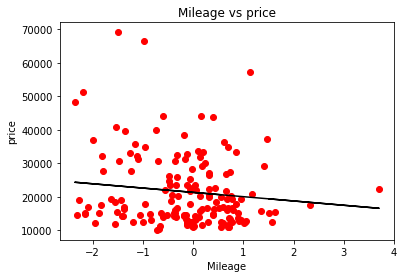

In [22]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, y_pred, color = "black")
plt.title("Mileage vs price")
plt.xlabel("Mileage")
plt.ylabel("price")
plt.show()

In [24]:
regressor.score(X_test,y_test)

0.02872584628111674

# **Tasks, Part 2**

In [25]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Transformed_Mileage,Transform_Mileage
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,9.014447,90.669730
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,9.119868,95.577194
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,9.487669,114.873844
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,9.701494,127.835832
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,9.895052,140.826134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0,9.694555,127.393092
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,9.857182,138.184659
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,9.927399,143.122325
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,10.165044,161.180024


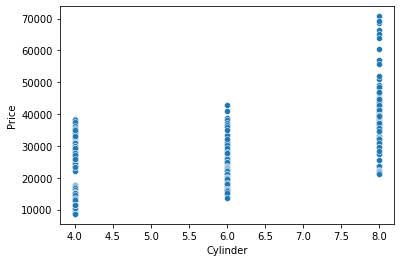

,Cylinder,Price
Cylinder,1.000000,0.569086
Price,0.569086,1.000000


In [67]:
sns.scatterplot(x=df['Cylinder'], y=df['Price'])
plt.show()
df[['Cylinder','Price']].corr()

**Has a linear relationship**

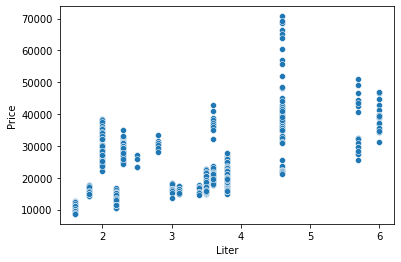

,Liter,Price
Liter,1.000000,0.558146
Price,0.558146,1.000000


In [27]:
sns.scatterplot(x= df['Liter'], y=df['Price'])
plt.show()
df[['Liter','Price']].corr()

**Has a linear relationship**

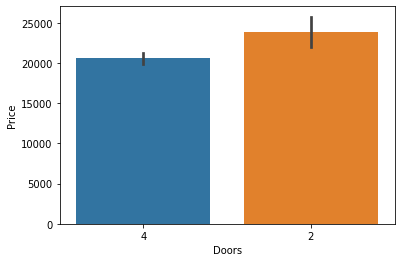

In [71]:
sns.barplot(x= df['Doors'], y= df['Price'],order=df.groupby('Doors')['Price'].mean().reset_index().sort_values('Price')['Doors'])
plt.show()

**Has a linear relationship**

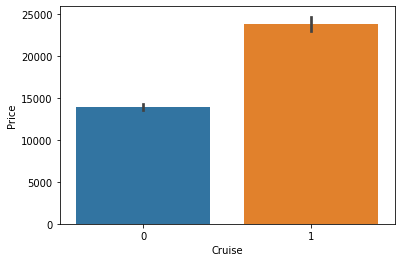

,Cruise,Price
Cruise,1.000000,0.430851
Price,0.430851,1.000000


In [30]:
sns.barplot(x=df['Cruise'], y=df['Price'])
plt.show()

**Has a linear relationship**

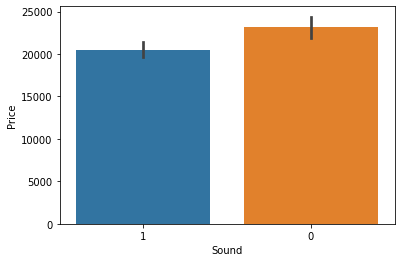

In [74]:
sns.barplot(x=df['Sound'], y=df['Price'],order=df.groupby('Sound')['Price'].mean().reset_index().sort_values('Price')['Sound'])
plt.show()

**Has a linear relationship**

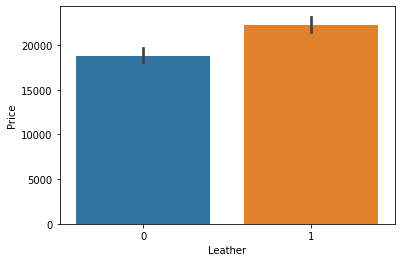

In [75]:
sns.barplot(x=df['Leather'], y=df['Price'],order=df.groupby('Leather')['Price'].mean().reset_index().sort_values('Price')['Leather'])
plt.show()

**Has a linear relationship**

In [76]:
X = df[['Cylinder', 'Liter', 'Cruise', 'Doors','Sound', 'Mileage','Leather']].values #array of features
y = df['Price'].values

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [78]:
from sklearn.preprocessing import StandardScaler ## standard scaling 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [79]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [80]:
print(regressor.intercept_ )# c 
print(regressor.coef_)

21388.492160454687
[ 5872.57636767 -1394.71660503  2581.53254147 -1404.77651926
  -947.02482111 -1569.84116044  1610.85453534]


In [81]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
0,12409.949094,20214.427923
1,33358.767771,21936.454031
2,12284.288290,13378.964767
3,32075.984874,17175.832307
4,28432.824213,16760.767018
...,...,...
156,20830.994296,20876.310117
157,16792.679529,29725.291787
158,15756.146130,18959.056340
159,15327.100321,14915.757444


In [82]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.36403375215183476


**Poor R2 value**

In [45]:
coeff_df = pd.DataFrame(regressor.coef_,['Cylinder', 'Liter', 'Cruise','Doors','Sound','Mileage','Leather'], columns=['Coefficient'])
y_pred = regressor.predict(X_test)
coeff_df

,Coefficient
Cylinder,5872.576368
Liter,-1394.716605
Cruise,2581.532541
Doors,-1404.776519
Sound,-947.024821
Mileage,-1569.841160
Leather,1610.854535


# **Tasks, Hard mode**

In [46]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Transformed_Mileage,Transform_Mileage
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,9.014447,90.669730
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,9.119868,95.577194
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,9.487669,114.873844
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,9.701494,127.835832
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,9.895052,140.826134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0,9.694555,127.393092
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,9.857182,138.184659
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,9.927399,143.122325
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,10.165044,161.180024


In [47]:
df= df.drop(columns= ["Transformed_Mileage",'Transform_Mileage'])

In [50]:
df["Make"].unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [51]:
df["Model"].unique()

array(['Century', 'Lacrosse', 'Lesabre', 'Park Avenue', 'CST-V', 'CTS',
       'Deville', 'STS-V6', 'STS-V8', 'XLR-V8', 'AVEO', 'Cavalier',
       'Classic', 'Cobalt', 'Corvette', 'Impala', 'Malibu', 'Monte Carlo',
       'Bonneville', 'G6', 'Grand Am', 'Grand Prix', 'GTO', 'Sunfire',
       'Vibe', '9_3', '9_3 HO', '9_5', '9_5 HO', '9-2X AWD', 'Ion',
       'L Series'], dtype=object)

In [52]:
df["Type"].unique()

array(['Sedan', 'Convertible', 'Hatchback', 'Coupe', 'Wagon'],
      dtype=object)

**One-hot encoding**

In [53]:
dummies1 = pd.get_dummies(df["Make"])
dummies2 = pd.get_dummies(df["Model"])
dummies3 = pd.get_dummies(df["Type"])

In [54]:
df= pd.concat([df,dummies1,dummies2, dummies3], axis="columns")

In [62]:
df

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Buick,Cadillac,...,STS-V6,STS-V8,Sunfire,Vibe,XLR-V8,Convertible,Coupe,Hatchback,Sedan,Wagon
0,17314.103129,8221,6,3.1,4,1,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9135,6,3.1,4,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,13196,6,3.1,4,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,16342,6,3.1,4,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,19832,6,3.1,4,1,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,6,3.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,19095,6,3.0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,20484,6,3.0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,25979,6,3.0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [56]:
df.shape

(804, 55)

In [57]:
df= df.drop(["Make","Model","Type","Trim"], axis= 1)

In [58]:
X= df.drop(["Price"], axis="columns")
Y= df["Price"]

In [59]:
X.shape, Y.shape

((804, 50), (804,))

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.2, random_state=10)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((643, 50), (161, 50), (643,), (161,))

In [61]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train,Y_train)
lr.score(X_test,Y_test)

0.9810360980255105

In [63]:
from sklearn.metrics import r2_score
accuracy= r2_score(Y_test,lr.predict(X_test))
accuracy

0.9810360980255105

In [64]:
Y_pred= lr.predict(X_test)

In [65]:
print(lr.intercept_)
print(lr.coef_)

25812.02302872007
[-1.79012126e-01  7.64012560e+02  7.54855447e+02 -1.32298625e+03
 -8.30240420e+01  3.15325498e+02  3.29929085e+02 -3.01257985e+03
  1.30920604e+04 -4.81025517e+03 -4.59434371e+03  4.44365165e+03
 -5.11853330e+03 -2.78971269e+03  2.43698638e+02  1.47767176e+03
  3.44470698e+03  2.06728697e+03 -5.45854632e+03  5.84533351e+02
  4.32796691e+03 -6.88501665e+03 -4.16046387e+03 -4.83575294e+03
 -2.97756385e+03 -3.35229308e+03  1.27412486e+04 -3.19817230e+03
  3.07452732e+02  6.20228590e+03 -4.14778912e+03 -1.58825662e+03
  6.39263469e+02 -2.77281663e+03 -2.34571667e+03  1.96746235e+02
 -1.19170690e+03 -2.38343888e+03  1.41538747e+02  2.81813376e+03
 -7.79758546e+01  2.83539102e+03 -4.55207662e+03 -1.40049334e+03
  1.60898672e+04  3.48134954e+03 -2.81985642e+03 -4.69411915e+02
 -5.49115250e+02  3.57034040e+02]


In [66]:
coef_df= pd.DataFrame(lr.coef_, X.columns, columns=["Coefficient"]) 
Y_predict= lr.predict(X_test)
coef_df

,Coefficient
Mileage,-0.179012
Cylinder,764.012560
Liter,754.855447
Doors,-1322.986251
Cruise,-83.024042
Sound,315.325498
Leather,329.929085
Buick,-3012.579846
Cadillac,13092.060381
Chevrolet,-4810.255173
